In [494]:
import antigravity

In [46]:
import requests
import pandas as pd
from datetime import datetime
import time
import matplotlib.pyplot as plt

In [30]:
PERIODS = [300, 900, 1800, 7200, 14400, 86400]

In [73]:
def to_timestamp(date = '2019-01-01 00:00:00'):
    date = datetime.strptime(date, "%Y-%m-%d %H:%M:%S")
    timestamp = (date - datetime(1970, 1, 1)).total_seconds()
    return int(timestamp)

In [462]:
def return_chart_data(start = '2019-01-01 00:00:00',
                      end = '2019-01-04 00:00:00',
                      period = 14400,
                      currency_pair = 'BTC_ETH'):
    start = to_timestamp(start)
    end = to_timestamp(end)
    url = "https://poloniex.com/public?command=returnChartData&currencyPair={}&start={}&end={}&period={}".format(currency_pair, start, end, period)
    r = requests.get(url)
    try:
        df = pd.DataFrame(r.json())
        df['date_unix_ts'] = df['date']
        df['date'] = df['date'].apply(lambda x: pd.to_datetime(x, unit='s'))
        return df
    except:
        print(r.text)
        return None

In [483]:
def add_tech_anal(ceny, short = 5, long =55):
    ceny['short_average'] = ceny['weightedAverage'].rolling(short).mean()
    ceny['long_average'] = ceny['weightedAverage'].rolling(long).mean()
    ceny['trend'] = ceny['short_average']*1.03 < ceny['long_average']
    return ceny

In [484]:
start_date = '2019-05-01 00:00:00'
end_date = '2019-08-01 00:00:00'
data = return_chart_data(start=start_date, end=end_date, currency_pair = 'BTC_ETH', period=PERIODS[0])

In [485]:
data = add_tech_anal(data, 5, 55)

In [486]:
data['last_trend'] = data['trend'].shift()
data['trend_changed'] = data['trend'] != data['last_trend']
data = data.dropna()

In [487]:
byla_hossa = data['last_trend'] == True
byla_bessa = data['last_trend'] == False
teraz_jest_hujowo = data['trend'] == False
teraz_jest_zajebiscie = data['trend'] == True

In [488]:
data['leave'] = byla_hossa & teraz_jest_hujowo
data['enter'] = byla_bessa & teraz_jest_zajebiscie

In [489]:
operations = data[['date', 'weightedAverage', 'enter', 'leave']][data['enter'] | data['leave']]

In [490]:
fee ** 855

0.1805563641084419

In [491]:
account_balance_btc = 1
acconut_balance_coin = 0
fee = 0.998
for transaction_number, operation in enumerate(operations.iterrows()):
    index, operation = operation
    date, rate, enter, leave = operation
    if enter:
        account_balance_btc, acconut_balance_coin = 0, (account_balance_btc / rate) * fee
    if leave:
        account_balance_btc, acconut_balance_coin = (acconut_balance_coin * rate) * fee, 0
    
    print(date, transaction_number)
    print('bitcoins: {}, other_coins: {}'.format(account_balance_btc, acconut_balance_coin))

2019-05-11 06:25:00 0
bitcoins: 0, other_coins: 39.024619138486564
2019-05-11 06:40:00 1
bitcoins: 1.0116940151499985, other_coins: 0
2019-05-11 23:55:00 2
bitcoins: 0, other_coins: 37.7117778357844
2019-05-12 00:55:00 3
bitcoins: 1.0136685861877632, other_coins: 0
2019-05-17 02:50:00 4
bitcoins: 0, other_coins: 31.433986628217458
2019-05-17 03:00:00 5
bitcoins: 1.0363285917849367, other_coins: 0
2019-05-30 17:15:00 6
bitcoins: 0, other_coins: 33.22528475765251
2019-05-30 17:40:00 7
bitcoins: 1.0369324519044867, other_coins: 0
2019-05-30 21:40:00 8
bitcoins: 0, other_coins: 34.37323832182125
2019-05-30 22:05:00 9
bitcoins: 1.0401886917625995, other_coins: 0
2019-06-22 03:10:00 10
bitcoins: 0, other_coins: 36.79524569886391
2019-06-22 03:15:00 11
bitcoins: 1.043167482573679, other_coins: 0
2019-07-14 10:05:00 12
bitcoins: 0, other_coins: 46.46155026710103
2019-07-14 11:25:00 13
bitcoins: 1.059091902523403, other_coins: 0
2019-07-14 12:25:00 14
bitcoins: 0, other_coins: 47.26393241753003

In [492]:
operations.iloc[-1]['weightedAverage'] / operations.iloc[0]['weightedAverage']

0.8310738417743299

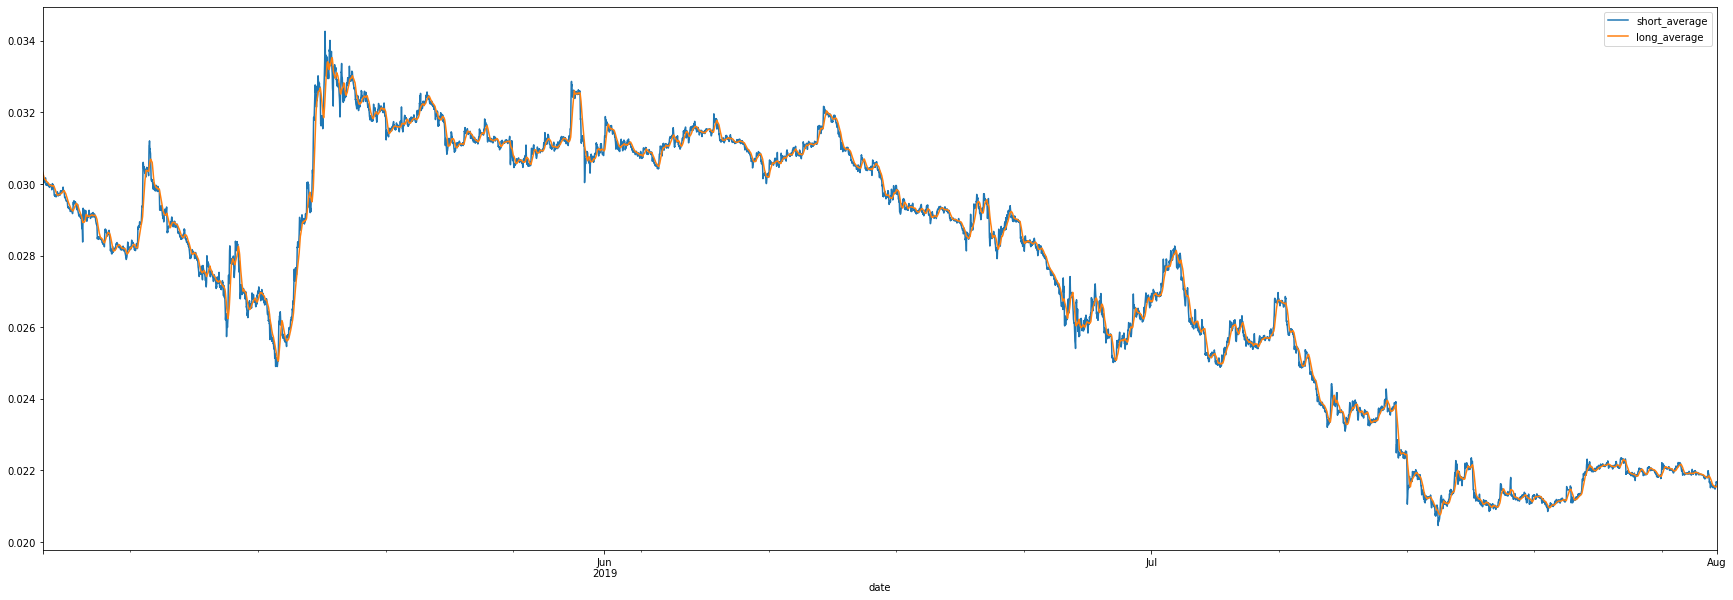

In [493]:
data.plot(x='date', y=['short_average', 'long_average'], figsize=(30,10))